<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house_csv = "C:/IOD/Data/Sacramento_transactions.csv"

In [4]:
df=pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
# zip should be categorical instead of numeric
df['zip'] = df['zip'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


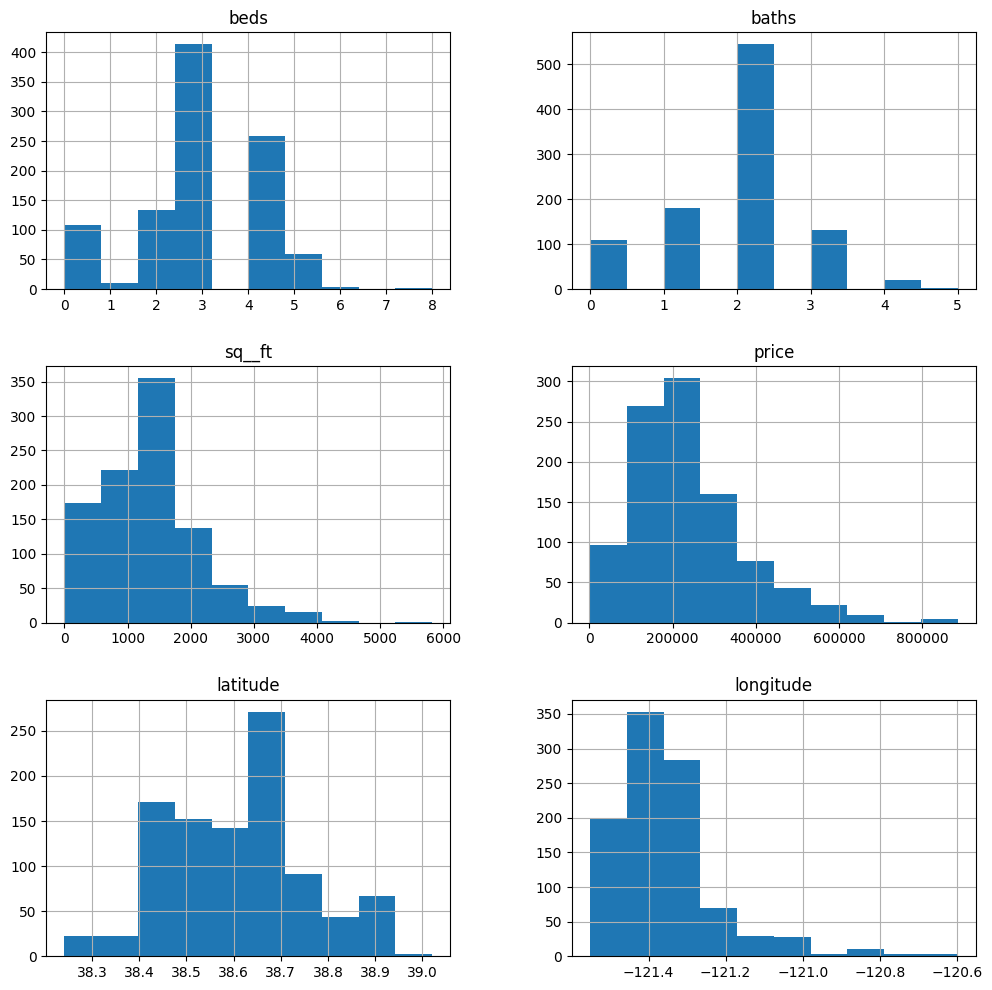

In [9]:
df.hist(figsize=(12,12))
plt.show()

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [10]:
# ANSWER
df['price']
# Price because it's the varibale that we want to predict

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

#### 2.2 List all possible variables which might be Predictor variable.

In [11]:
# ANSWER
df['beds']
df['baths']
df['sq__ft']

0       836
1      1167
2       796
3       852
4       797
       ... 
980    2280
981    1477
982    1216
983    1685
984    1362
Name: sq__ft, Length: 985, dtype: int64

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [12]:
# ANSWER
df.corr(numeric_only=True)

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


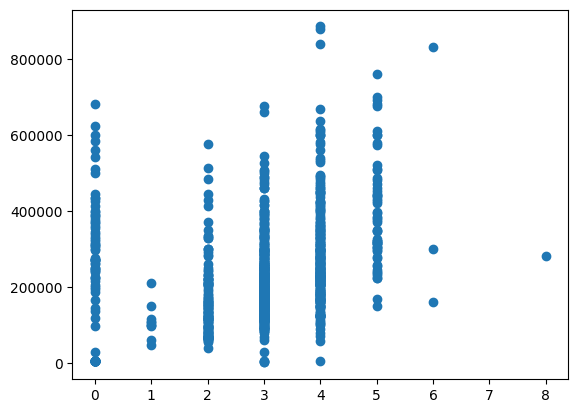

In [13]:
plt.scatter(x=df['beds'],y=df['price'])
plt.show()

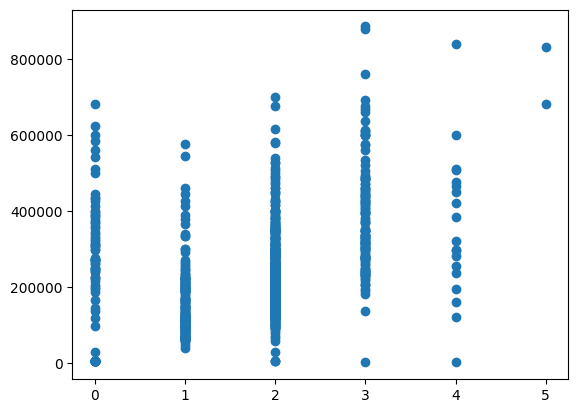

In [14]:
plt.scatter(x=df['baths'],y=df['price'])
plt.show()

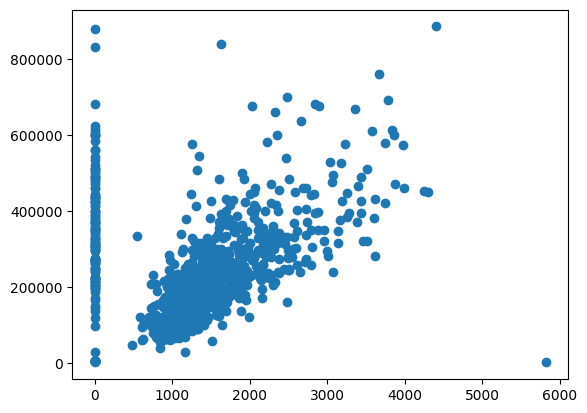

In [15]:
plt.scatter(x=df['sq__ft'],y=df['price'])
plt.show()

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [16]:
# ANSWER
# mean
df['y_bar'] = df['price'].mean()
df['y_bar']

0      234144.263959
1      234144.263959
2      234144.263959
3      234144.263959
4      234144.263959
           ...      
980    234144.263959
981    234144.263959
982    234144.263959
983    234144.263959
984    234144.263959
Name: y_bar, Length: 985, dtype: float64

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [17]:
# ANSWER
res = abs(df['price']-df['y_bar'])
res


0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [18]:
# ANSWER
X = df['sq__ft']
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [19]:
# ANSWER
X_bar = X.mean()
Y_bar = Y.mean()
num = np.sum((Y-Y_bar)*(X-X_bar))
denom =  np.sum(np.square((X-X_bar)))
beta_1 = num/denom
beta_1   

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [20]:
# ANSWER
beta_0 = Y_bar - beta_1*X_bar
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [21]:
# ANSWER
Yhat = beta_0 + beta_1*X
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [22]:
# ANSWER
res = abs(Y-Yhat)
res

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [23]:
# ANSWER
def calc_SStot(Y,Y_bar):
    SStot = np.square(Y-Y_bar)
    SStot = np.sum(SStot)
    return SStot
SStot = calc_SStot(Y,Y_bar)
SStot

18838783738865.37

In [24]:
def calc_SSres(Y,Yhat):
    SSres = np.square(Y-Yhat)
    SSres = np.sum(SSres)
    return SSres
SSres = calc_SSres(Y,Yhat)
SSres

16738500924917.504

In [25]:
Rsquare = 1 -(SSres/SStot)
Rsquare

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [26]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [27]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [28]:
# ANSWER
y_predict = beta_0 + beta_1*1204
y_predict

228137.1635919888



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



